In [1]:
import pandas as pd
import numpy as np
import random
import seaborn as sb
import math
import matplotlib.pyplot as plt
%matplotlib inline
from collections import Counter
import operator

columns = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","attack", "last_flag"]

In [2]:
set_data = pd.read_csv('20 Percent Training Set.csv', quotechar=',', skipinitialspace=True, names= columns)# -*- coding: utf-8 -*-
set_data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769,19.487695
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333,2.328541
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [3]:
mapping_attacktypes = {
         'normal': 0,
        'back': 1,
        'land': 1,
        'neptune': 1,
        'pod': 1,
        'smurf': 1,
        'teardrop': 1,
        'mailbomb': 1,
        'apache2': 1,
        'processtable': 1,
        'udpstorm': 1,
        'ipsweep': 1,
        'nmap': 1,
        'portsweep': 1,
        'satan': 1,
        'mscan': 1,
        'saint': 1,
        'ftp_write': 1,
        'guess_passwd': 1,
        'imap': 1,
        'multihop': 1,
        'phf': 1,
        'spy': 1,
        'warezclient': 1,
        'warezmaster': 1,
        'sendmail': 1,
        'named': 1,
        'snmpgetattack': 1,
        'snmpguess': 1,
        'xlock': 1,
        'xsnoop': 1,
        'worm': 1,
        'buffer_overflow': 1,
        'loadmodule': 1,
        'perl': 1,
        'rootkit': 1,
        'httptunnel': 1,
        'ps': 1,
        'sqlattack': 1,
        'xterm': 1
    }# -*- coding: utf-8 -*-

In [4]:
mapping_type1 = {'SF':0,
'S0':1,
'REJ':2,
'RSTR':3,
'SH':4,
'RSTO':5,
'S1':6,
'RSTOS0':7,
'S3':8,
'S2':9,
'OTH':10}
mapping_type2 = {
'ftp_data':0,
'other':1,
'private':2,
'http':3,
'remote_job':4,
'name':5,
'netbios_ns':6,
'eco_i':7,
'mtp':8,
'telnet':9,
'finger':10,
'domain_u':11,
'supdup':12,
'uucp_path':13,
'Z39_50':14,
'smtp':15,
'csnet_ns':16,
'uucp':17,
'netbios_dgm':18,
'urp_i':19,
'auth':20,
'domain':21,
'ftp':22,
'bgp':23,
'ldap':24,
'ecr_i':25,
'gopher':26,
'vmnet':27,
'systat':28,
'http_443':29,
'efs':30,
'whois':31,
'imap4':32,
'iso_tsap':33,
'echo':34,
'klogin':35,
'link':36,
'sunrpc':37,
'login':38,
'kshell':39,
'sql_net':40,
'time':41,
'hostnames':42,
'exec':43,
'ntp_u':44,
'discard':45,
'nntp':46,
'courier':47,
'ctf':48,
'ssh':49,
'daytime':50,
'shell':51,
'netstat':52,
'pop_3':53,
'nnsp':54,
'IRC':55,
'pop_2':56,
'printer':57,
'tim_i':58,
'pm_dump':59,
'red_i':60,
'netbios_ssn':61,
'rje':62,
'X11':63,
'urh_i':64,
'http_8001':65}

In [5]:
set_data['attack_class'] = set_data['attack'].apply(lambda v: mapping_attacktypes[v])
set_data.drop(['attack'], axis=1, inplace=True)
set_data['flags'] = set_data['flag'].apply(lambda v: mapping_type1[v])
set_data.drop(['flag'], axis=1, inplace=True)
set_data['services'] = set_data['service'].apply(lambda v: mapping_type2[v])
set_data.drop(['service'], axis=1, inplace=True)
#Removing redundant data
set_data.drop(['num_outbound_cmds'], axis=1, inplace=True)

set_data['attack_class'].value_counts()

0    13449
1    11743
Name: attack_class, dtype: int64

In [6]:
set_data

,duration,protocol_type,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,...,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,last_flag,attack_class,flags,services
0,0,tcp,491,0,0,0,0,0,0,0,...,0.17,0.00,0.00,0.00,0.05,0.00,20,0,0,0
1,0,udp,146,0,0,0,0,0,0,0,...,0.88,0.00,0.00,0.00,0.00,0.00,15,0,0,1
2,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,19,1,1,2
3,0,tcp,232,8153,0,0,0,0,0,1,...,0.03,0.04,0.03,0.01,0.00,0.01,21,0,0,3
4,0,tcp,199,420,0,0,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,21,0,0,3
5,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,0.00,0.00,1.00,1.00,21,1,2,2
6,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1,2
7,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1,2
8,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1,4
9,0,tcp,0,0,0,0,0,0,0,0,...,0.00,0.00,1.00,1.00,0.00,0.00,21,1,1,2


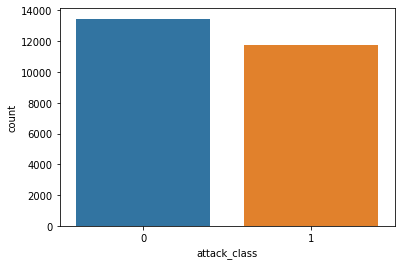

In [7]:
sb.countplot(x = 'attack_class', data = set_data)

In [8]:
set_data.isnull().sum()

duration                       0
protocol_type                  0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_host_rate             0
dst_host_count                 0
dst_host_srv_count             0
dst_host_s

In [9]:
features = ['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'attack_class']
X=set_data[features]
X.head()

,src_bytes,dst_bytes,logged_in,count,srv_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_serror_rate,attack_class
0,491,0,0,2,2,25,0.03,0.17,0.00,0
1,146,0,0,13,1,1,0.60,0.88,0.00,0
2,0,0,0,123,6,26,0.05,0.00,1.00,1
3,232,8153,1,5,5,255,0.00,0.03,0.03,0
4,199,420,1,30,32,255,0.00,0.00,0.00,0


In [10]:
from sklearn.preprocessing import StandardScaler
col_names = ['src_bytes',
 'dst_bytes',
 'logged_in',
 'count',
 'srv_count',
 'dst_host_srv_count',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate']
sf = X.copy()
features = sf[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
sf[col_names] = features
X = sf.copy()

In [11]:
alpha = 0.1

In [12]:
Y=X['attack_class'].copy()
Y=np.array(Y).T

In [13]:
X.drop(['attack_class'], axis=1, inplace=True)

In [14]:
X = np.array(X)

In [15]:
number_of_iterations = 1000
learning_rate = 0.001

In [16]:
def sigmoid_function(theta, X, i):
    return (1 / (1 + np.exp(-float(np.matmul(theta, X[i])))))

In [17]:
def hypothesis_function(theta, X, nshape):
    hypo = np.ones((X.shape[0],1))
    theta = theta.reshape(1,nshape+1)
    for i in range(0,X.shape[0]):
        hypo[i] = hypo[i] = sigmoid_function(theta, X, i)
    hypo = hypo.reshape(X.shape[0])
    return hypo

In [18]:
def loss_function(X, y, hypo):
    return (-1/X.shape[0])*sum(y*np.log(hypo)+(1-y)*np.log(1 - hypo))

In [19]:
def gradient_descent(theta, learning_rate, number_of_iterations, hypo, X, y, nshape):
    theta_previous = np.ones((number_of_iterations,nshape+1))
    loss = np.ones(number_of_iterations)
    for i in range(0,number_of_iterations):
        theta[0] = theta[0] - (learning_rate/X.shape[0]) * sum(hypo - y)
        for j in range(1,nshape+1):
            theta[j]=theta[j]-(learning_rate/X.shape[0])*sum((hypo-y)
                               *X.transpose()[j])
        theta_previous[i] = theta
        hypo = hypothesis_function(theta, X, nshape)
        #loss function
        loss[i] = loss_function(X, y, hypo)
    theta = theta.reshape(1,nshape+1)
    return theta, theta_previous, loss

In [20]:
def logistic_regression(X, y, learning_rate, number_of_iterations):
    nshape = X.shape[1]
    one_column = np.ones((X.shape[0],1))
    X = np.concatenate((one_column, X), axis = 1)
    theta = np.zeros(nshape+1)
    # calculating hypothesis
    hypo = hypothesis_function(theta, X, nshape)
    # Implementing gradient descent to find appropriate theta values
    theta,theta_previous,loss = gradient_descent(theta,learning_rate,number_of_iterations,hypo,X,y,nshape)
    return theta, theta_previous, loss

In [21]:
# splitting the dataset into training set and test set

from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [22]:
Xdatatrain = X_train.astype('float64')
Ydatatrain = Y_train.astype('float64')
Xdatatest = X_test.astype('float64') 
Ydatatest = Y_test.astype('float64')

In [23]:
Xdatatrain

array([[-0.00966444, -0.03930979, -0.80762582, ..., -0.3875181 ,
         2.27833106, -0.64180407],
       [-0.01004897, -0.03766618, -0.80762582, ..., -0.3875181 ,
        -0.47818309, -0.64180407],
       [-0.00996933, -0.00821632,  1.23819717, ..., -0.4409405 ,
        -0.15388731, -0.64180407],
       ...,
       [-0.01009252, -0.03930979, -0.80762582, ..., -0.1204061 ,
        -0.47818309,  1.60383449],
       [-0.009596  , -0.03359093,  1.23819717, ...,  0.0398611 ,
        -0.3160352 , -0.64180407],
       [-0.00999629, -0.03415381,  1.23819717, ..., -0.4409405 ,
         0.17040847, -0.64180407]])

In [24]:
Ydatatrain

array([1., 0., 0., ..., 1., 0., 0.])

In [25]:
#Using training dataset for obtaining the value of theta
theta,theta_previous,loss=logistic_regression(Xdatatrain,Ydatatrain,learning_rate, number_of_iterations)

In [26]:
theta

array([[-0.02939726,  0.0030956 , -0.00398566, -0.25300702,  0.21321392,
        -0.00634435, -0.26739526,  0.07893812,  0.04333702,  0.24451624]])

In [27]:
#Testing the value of theta with the Training dataset itself
Xdatatrain = np.concatenate((np.ones((Xdatatrain.shape[0],1)), Xdatatrain)
                          , axis = 1)
h = hypothesis_function(theta, Xdatatrain, Xdatatrain.shape[1] - 1)
# Taking 0.5 as threshold:
for i in range(0, h.shape[0]):
    if h[i] > 0.5:
        h[i] = 1
    else:
        h[i] = 0

In [28]:
k = 0
for i in range(0, h.shape[0]):
    if h[i] == Ydatatrain[i]:
        k = k + 1
accuracy = k/Ydatatrain.shape[0]

In [29]:
accuracy

0.9014042574306554

In [30]:
#Testing the value of theta obtained previously on testset
Xdatatest = np.concatenate((np.ones((Xdatatest.shape[0],1)), Xdatatest)
                          , axis = 1)
htest = hypothesis_function(theta, Xdatatest, Xdatatest.shape[1] - 1)
# Taking 0.5 as threshold:
for i in range(0, htest.shape[0]):
    if htest[i] > 0.5:
        htest[i] = 1
    else:
        htest[i] = 0
ktest = 0
for i in range(0, htest.shape[0]):
    if htest[i] == Ydatatest[i]:
        ktest = ktest + 1
accuracy = ktest/Ydatatest.shape[0]
print("Accuracy:",accuracy)

Accuracy: 0.9065290732288153


In [31]:
print(Ydatatest)

[0. 1. 0. ... 0. 0. 1.]


In [32]:
trueneg = 0
falseneg = 0
for i in range(0, len(Ydatatest)):
    if htest[i] == Ydatatest[i] == 0:
        trueneg = trueneg + 1
    elif htest[i] == 0 and Ydatatest[i] == 1:
        falseneg = falseneg + 1

In [33]:
truepos = 0
for i in range(0, len(Ydatatest)):
    if htest[i] == Ydatatest[i] == 1:
        truepos = truepos + 1

In [34]:
falsepos = 0
for i in range(0, len(Ydatatest)):
    if htest[i] == 1 and Ydatatest[i] == 0:
        falsepos = falsepos + 1


In [35]:
precision = truepos/(truepos + falsepos)
print("Precision:",precision)

Precision: 0.8799672265464973


In [36]:
recall = truepos/(truepos + falseneg)

In [37]:
print("Recall:",recall)

Recall: 0.9234737747205503


In [38]:
f_measure = (2 * precision * recall)/(precision + recall)
print("F-Measure:",f_measure)

F-Measure: 0.9011957205789803


In [39]:
print('fp',falsepos)
print('fn',falseneg)
print('tn',trueneg)
print('tp',truepos)

fp 293
fn 178
tn 2420
tp 2148


In [40]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(Ydatatest, htest)
print("Confusion Matrix\n",confusion_mat)

Confusion Matrix
 [[2420  293]
 [ 178 2148]]
